<a href="https://colab.research.google.com/github/markrubin85/CP_Counterfeit_Detection/blob/main/Banknote_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mounting Google Drive to Colab and Uploading Dataset**

In [1]:
from google.colab import drive, auth
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title= 'CapStone_COP_Banknote_Data.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('CapStone_COP_Banknote_Data.zip')
!unzip CapStone_COP_Banknote_Data.zip

# **Importing Various Libraries and Toolkits.** 


In [130]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping


### **Exploratory Data Analysis (EDA)**


In [5]:
ds1_train = tf.keras.preprocessing.image_dataset_from_directory('/content/COP_banknote/ds1/Train', labels='inferred',  label_mode='categorical',image_size=(224,224), batch_size=32)
ds1_test = tf.keras.preprocessing.image_dataset_from_directory('/content/COP_banknote/ds1/Test', labels='inferred', label_mode='categorical',image_size=(224,224), batch_size=32)
ds1_validation = tf.keras.preprocessing.image_dataset_from_directory('/content/COP_banknote/ds1/Validation', labels='inferred', label_mode='categorical',image_size=(224,224), batch_size=32)


Found 4368 files belonging to 13 classes.
Found 1456 files belonging to 13 classes.
Found 1456 files belonging to 13 classes.


In [6]:
class_names = ds1_train.class_names
print('Class Names:', class_names)
print('Number of Classes:', len(class_names))

Class Names: ['100k', '100kf', '10k', '10kf', '20k', '20kf', '2k', '2kf', '50k', '50kf', '5k', '5kf', 'Background']
Number of Classes: 13


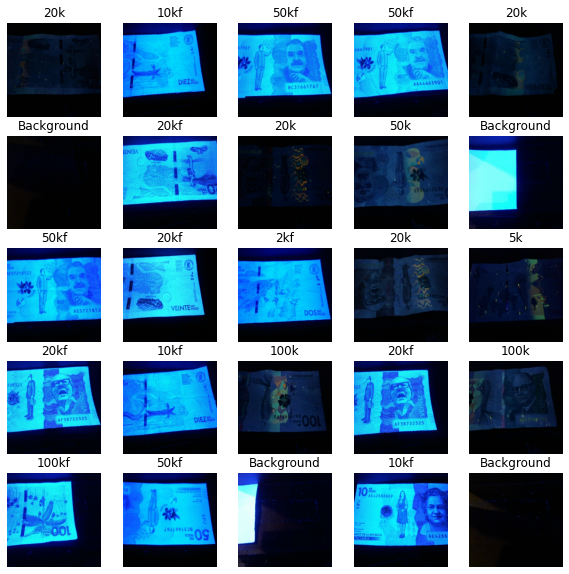

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in ds1_train.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in ds1_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 13)


In [9]:
for image_batch, labels_batch in ds1_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 13)


In [32]:
Real, Fake = [], []
for x,y in ds1_test:
  for i in range(y.shape[0]):
    class_ = ds1_test.class_names[np.argmax(y[i], axis=-1)]
    if 'f' in class_: 
      Fake.append(x[i])
    elif class_ != 'Background':
      Real.append(x[i])

print('Real:', len(Real), 'Mean:', np.array(Real).mean())
print('Fake:', len(Fake), 'Mean:', np.array(Fake).mean())

In [ ]:
counts = Counter(test_counts)
counts

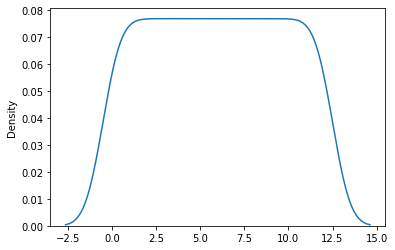

In [22]:
len(y_test)
test_counts = np.argmax(y_test, axis = 1)
#plt.hist(test_counts)
sns.kdeplot(test_counts,)

## **Custom Model** 

In [48]:
num_classes = 13

custom_model = Sequential([                     
  Conv2D(64, 11, strides=4, padding='same', activation='relu', input_shape=(224, 224, 3)),
  MaxPooling2D(3, strides=2, padding='valid'),
  Conv2D(192, 5, strides=1, padding='same', activation='relu'),
  MaxPooling2D(3, strides=2, padding='valid'),
  Conv2D(384, 3, strides=1, padding='same', activation='relu'),
  Conv2D(256, 3, strides=1, padding='same', activation='relu'),
  Conv2D(256, 3, strides=1, padding='same', activation='relu'),
  MaxPooling2D(3, strides=2, padding='valid'),
  Flatten(),
  Dropout(.5),
  Dense(512, activation=None),
  Dropout(.5),
  Dense(512, activation=None),
  Dense(num_classes, activation='softmax')
])

In [49]:
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 56, 56, 64)        23296     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 192)       307392    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 192)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)       663936    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 256)       884992    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 256)      

In [50]:
custom_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
cm_results = custom_model.fit(ds1_train, epochs=10, batch_size=32, validation_data=ds1_validation, validation_batch_size=32)

Epoch 1/10
137/137 [==============================] - 19s 131ms/step - loss: 0.4097 - accuracy: 0.8478 - val_loss: 0.3621 - val_accuracy: 0.8654
Epoch 2/10
137/137 [==============================] - 19s 131ms/step - loss: 0.3569 - accuracy: 0.8668 - val_loss: 0.3169 - val_accuracy: 0.8805
Epoch 3/10
137/137 [==============================] - 19s 131ms/step - loss: 0.3501 - accuracy: 0.8732 - val_loss: 0.3131 - val_accuracy: 0.8839
Epoch 4/10
137/137 [==============================] - 19s 132ms/step - loss: 0.3463 - accuracy: 0.8713 - val_loss: 0.3580 - val_accuracy: 0.8702
Epoch 5/10
137/137 [==============================] - 18s 130ms/step - loss: 0.2854 - accuracy: 0.8972 - val_loss: 0.2787 - val_accuracy: 0.8915
Epoch 6/10
137/137 [==============================] - 18s 130ms/step - loss: 0.2424 - accuracy: 0.9105 - val_loss: 0.3598 - val_accuracy: 0.8620
Epoch 7/10
137/137 [==============================] - 19s 131ms/step - loss: 0.2618 - accuracy: 0.9054 - val_loss: 0.2918 - val_ac

In [126]:
custom_model.save('/content/drive/MyDrive/Flatiron/Custom_Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Flatiron/Custom_Model/assets


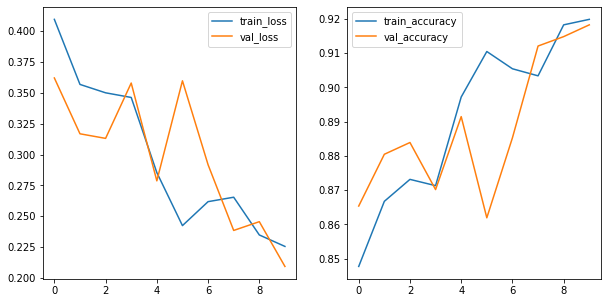

In [53]:
train_loss = cm_results.history['loss']
train_acc = cm_results.history['accuracy']
val_loss = cm_results.history['val_loss']
val_acc = cm_results.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=cm_results.epoch, y=train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=cm_results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=cm_results.epoch, y=val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=cm_results.epoch, y=val_acc, ax=ax2, label='val_accuracy');

In [54]:
test_loss, test_acc = custom_model.evaluate(ds1_test)

46/46 [==============================] - 4s 81ms/step - loss: 0.1882 - accuracy: 0.9272


In [55]:
val_loss, val_acc = custom_model.evaluate(ds1_validation)

46/46 [==============================] - 4s 82ms/step - loss: 0.2093 - accuracy: 0.9183


In [57]:
print('Test Accuracy Score:', test_acc)
print('Validation Accuracy Score:', val_acc)

Test Accuracy Score: 0.9271978139877319
Validation Accuracy Score: 0.9182692170143127


In [102]:
test_labels = ds1_test.map(lambda x,y: y)
y_test = []

for batch in test_labels:
  for y in batch:
    y_test.append(y)

In [104]:
y_pred = np.argmax(custom_model.predict(ds1_test), axis=1)
y_test = np.argmax(y_test, axis=1)
custom_model_cm = confusion_matrix(y_test, y_pred)
custom_model_cm

array([[12, 10,  9, 11,  7,  5,  4,  8,  5, 16, 10,  8,  7],
       [10, 15,  6,  6,  9,  9, 12,  6,  3,  6, 15,  7,  8],
       [15,  9,  9,  7,  6, 12,  7, 14,  7,  4, 15,  1,  6],
       [ 8,  8,  2, 16,  8,  6,  6,  7, 11, 12,  9, 13,  6],
       [ 9, 10,  5,  5, 11, 12,  7,  8, 10, 10,  5, 10, 10],
       [ 9,  9,  7, 10, 12,  8,  5,  9,  5, 13,  5,  9, 11],
       [12,  6, 11, 12, 10, 11,  9,  7,  7,  6, 13,  3,  5],
       [10,  3,  6,  6,  6, 10, 10,  5, 14,  7, 13,  9, 13],
       [ 2,  7, 11, 11,  8,  7, 13,  8, 11,  4,  7, 10, 13],
       [ 5, 16,  2, 10, 10,  8,  8, 11, 10,  7,  7, 10,  8],
       [ 9,  4, 10,  4, 12,  7, 11,  9,  9, 11, 11,  9,  6],
       [ 8,  7,  5,  9, 10,  9,  6, 12, 10,  9, 10,  6, 11],
       [10,  9,  7,  8, 11,  8, 10,  6,  7,  7, 10, 13,  6]])

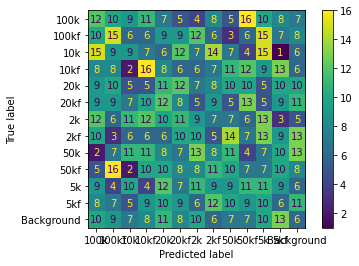

In [131]:
disp = ConfusionMatrixDisplay(confusion_matrix=custom_model_cm, display_labels=ds1_test.class_names)
disp.plot(), 

### **InceptionV3 Modeling** ##

In [105]:
base_model = tf.keras.applications.InceptionV3(
    weights = 'imagenet',
    input_shape=(224, 224, 3),
    include_top=False,
    )

87916544/87910968 [==============================] - 3s 0us/step


In [106]:
base_model.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
outputs = Dense(13, activation='softmax')(x)

InceptionV3_model = tf.keras.Model(base_model.input, outputs)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
InceptionV3_model.summary()

In [108]:
InceptionV3_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
InceptionV3_results = InceptionV3_model.fit(ds1_train, epochs=10, batch_size=32, validation_data=ds1_validation, validation_batch_size=32)

Epoch 1/10
137/137 [==============================] - 31s 188ms/step - loss: 1.9826 - accuracy: 0.4435 - val_loss: 1.2381 - val_accuracy: 0.6051
Epoch 2/10
137/137 [==============================] - 25s 176ms/step - loss: 0.8615 - accuracy: 0.7321 - val_loss: 0.8893 - val_accuracy: 0.7184
Epoch 3/10
137/137 [==============================] - 25s 176ms/step - loss: 0.6446 - accuracy: 0.7921 - val_loss: 0.8048 - val_accuracy: 0.7720
Epoch 4/10
137/137 [==============================] - 25s 176ms/step - loss: 0.5313 - accuracy: 0.8281 - val_loss: 0.4611 - val_accuracy: 0.8551
Epoch 5/10
137/137 [==============================] - 25s 178ms/step - loss: 0.5566 - accuracy: 0.8363 - val_loss: 1.4460 - val_accuracy: 0.6957
Epoch 6/10
137/137 [==============================] - 25s 178ms/step - loss: 0.4600 - accuracy: 0.8595 - val_loss: 0.5454 - val_accuracy: 0.8558
Epoch 7/10
137/137 [==============================] - 25s 177ms/step - loss: 0.4417 - accuracy: 0.8630 - val_loss: 0.4385 - val_ac

In [127]:
InceptionV3_model.save('/content/drive/MyDrive/Flatiron/InceptionV3_Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Flatiron/InceptionV3_Model/assets


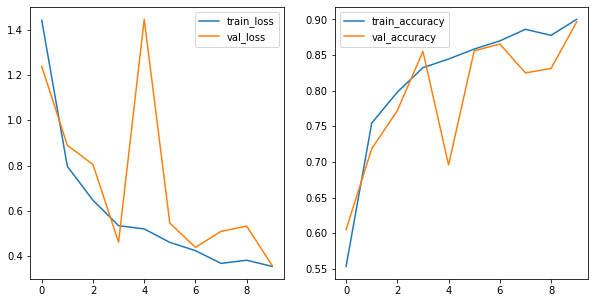

In [110]:
InV3_train_loss = InceptionV3_results.history['loss']
InV3_train_acc = InceptionV3_results.history['accuracy']
InV3_val_loss = InceptionV3_results.history['val_loss']
InV3_val_acc = InceptionV3_results.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=InceptionV3_results.epoch, y=InV3_train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=InceptionV3_results.epoch, y=InV3_train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=InceptionV3_results.epoch, y=InV3_val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=InceptionV3_results.epoch, y=InV3_val_acc, ax=ax2, label='val_accuracy');

In [111]:
test_loss, test_acc = InceptionV3_model.evaluate(ds1_test)
val_loss, val_acc = InceptionV3_model.evaluate(ds1_validation)

46/46 [==============================] - 6s 117ms/step - loss: 0.3571 - accuracy: 0.8963


In [113]:
y_pred = np.argmax(InceptionV3_model.predict(ds1_test), axis=1)
InceptionV3_cm = confusion_matrix(y_test, y_pred)
InceptionV3_cm

array([[11,  6,  5,  6,  7,  6,  9, 15, 10,  8, 12,  4, 13],
       [ 8, 10,  9,  7,  7,  5, 12, 13,  7,  6,  9, 10,  9],
       [ 6, 10,  9,  5,  6,  9, 21,  8,  7,  6, 13,  6,  6],
       [ 8,  4,  3,  5,  8, 11, 19, 10, 10,  8,  6,  9, 11],
       [ 8,  9,  5,  8, 12,  8, 10,  7,  7, 13,  8, 11,  6],
       [ 4, 12,  7,  4,  8,  4, 13, 12, 12, 10,  6,  8, 12],
       [ 9, 10,  2,  6,  9, 10, 10, 10, 10,  7, 10, 10,  9],
       [ 7,  6,  5,  4,  6, 11, 17, 11, 11, 11, 10,  9,  4],
       [ 5,  8,  5,  8,  6,  9, 11, 11,  9, 11,  9,  9, 11],
       [11, 15,  4,  6,  8,  4,  6, 12,  8,  6, 14,  8, 10],
       [ 8, 11,  4,  6, 11,  6, 10, 15,  2,  8, 12,  7, 12],
       [ 9,  9, 12,  8, 12,  8,  9, 14,  6,  7,  7,  5,  6],
       [11, 12,  4,  5,  6, 11, 13, 15,  6,  7,  7, 12,  3]])

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fe6063f6ed0>,)

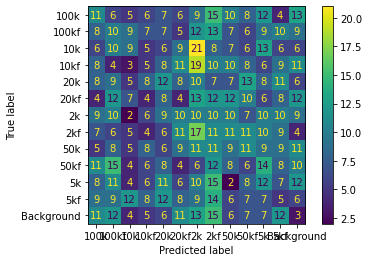

In [132]:
disp = ConfusionMatrixDisplay(confusion_matrix=InceptionV3_cm, display_labels=ds1_test.class_names)
disp.plot(), 

## **ResNet50 Modeling**

In [114]:
rn_base_model = tf.keras.applications.ResNet50(
    include_top=False, 
    weights='imagenet',
    input_shape=(224, 224, 3),
    )


94773248/94765736 [==============================] - 1s 0us/step


In [115]:
rn_base_model.trainable = False
x1 = rn_base_model.output
x1 = Flatten()(x1)
x1 = Dropout(0.4)(x1)
x1 = Dense(2048, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.4)(x1)
x1 = Dense(2048, activation='relu')(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2)(x1)
rn_outputs = Dense(13, activation='softmax')(x1)


ResNet50_model = tf.keras.Model(rn_base_model.input, rn_outputs)
for layer in rn_base_model.layers:
    layer.trainable = False

In [ ]:
ResNet50_model.summary()

In [117]:
ResNet50_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [118]:
ResNet50_results = ResNet50_model.fit(ds1_train, epochs=10, batch_size=32, validation_data=ds1_validation, validation_batch_size=32)

Epoch 1/10
137/137 [==============================] - 33s 210ms/step - loss: 1.0171 - accuracy: 0.7637 - val_loss: 0.2956 - val_accuracy: 0.9526
Epoch 2/10
137/137 [==============================] - 28s 199ms/step - loss: 0.0882 - accuracy: 0.9743 - val_loss: 0.1482 - val_accuracy: 0.9609
Epoch 3/10
137/137 [==============================] - 28s 200ms/step - loss: 0.0509 - accuracy: 0.9870 - val_loss: 0.0274 - val_accuracy: 0.9938
Epoch 4/10
137/137 [==============================] - 28s 200ms/step - loss: 0.0345 - accuracy: 0.9909 - val_loss: 0.0281 - val_accuracy: 0.9938
Epoch 5/10
137/137 [==============================] - 28s 200ms/step - loss: 0.0530 - accuracy: 0.9862 - val_loss: 0.0297 - val_accuracy: 0.9918
Epoch 6/10
137/137 [==============================] - 28s 200ms/step - loss: 0.0153 - accuracy: 0.9963 - val_loss: 0.0105 - val_accuracy: 0.9986
Epoch 7/10
137/137 [==============================] - 28s 201ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0121 - val_ac

In [128]:
ResNet50_model.save('/content/drive/MyDrive/Flatiron/ResNet50_Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Flatiron/ResNet50_Model/assets


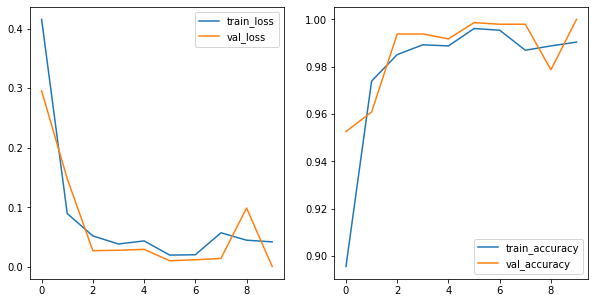

In [119]:
rn_train_loss = ResNet50_results.history['loss']
rn_train_acc = ResNet50_results.history['accuracy']
rn_val_loss = ResNet50_results.history['val_loss']
rn_val_acc = ResNet50_results.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(x=ResNet50_results.epoch, y=rn_train_loss, ax=ax1, label='train_loss')
sns.lineplot(x=ResNet50_results.epoch, y=rn_train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(x=ResNet50_results.epoch, y=rn_val_loss, ax=ax1, label='val_loss')
sns.lineplot(x=ResNet50_results.epoch, y=rn_val_acc, ax=ax2, label='val_accuracy');

In [120]:
test_loss, test_acc = ResNet50_model.evaluate(ds1_test)

46/46 [==============================] - 6s 127ms/step - loss: 0.0131 - accuracy: 0.9973


In [121]:
y_pred = np.argmax(ResNet50_model.predict(ds1_test), axis=1)
ResNet50_cm = confusion_matrix(y_test, y_pred)
ResNet50_cm

array([[ 5, 15,  7,  6, 10,  6,  8,  8, 11, 11,  8,  7, 10],
       [12,  6,  7,  7, 12,  9,  4, 10, 12,  9,  6,  9,  9],
       [ 5, 13, 10,  8, 10,  9, 17, 10,  6,  5,  6,  9,  4],
       [13, 15,  7, 10,  7,  7,  7,  4,  9,  7,  9, 12,  5],
       [ 7,  6,  6,  5, 12, 11,  5, 15, 10,  8, 13,  7,  7],
       [ 5,  8, 10, 10,  7,  7, 11, 10,  9,  9, 10,  6, 10],
       [ 7,  9,  9, 10,  7, 10,  5,  7,  8, 12, 10, 11,  7],
       [12,  4,  8,  5,  9, 12, 15,  7, 13,  7,  6,  7,  7],
       [ 9,  6,  9, 14, 10,  6,  5,  3,  7,  7,  9,  8, 19],
       [11, 15, 11,  8,  7,  8,  5,  7,  8,  8, 10,  7,  7],
       [10,  7, 12,  9,  4, 10, 12,  6,  7, 10, 10,  8,  7],
       [10,  6,  8,  8,  8,  7, 10, 14,  4,  9,  7,  8, 13],
       [ 6,  5,  8, 12,  8, 10,  8, 11,  9, 10,  8, 10,  7]])

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fe60a26d910>,)

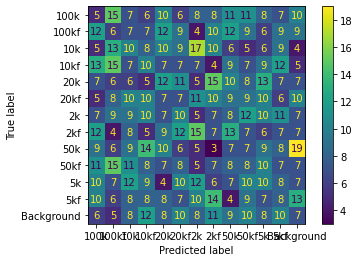

In [133]:
disp = ConfusionMatrixDisplay(confusion_matrix=ResNet50_cm, display_labels=ds1_test.class_names)
disp.plot(), 

In [122]:
for x,y in ds1_test:
  print(x.shape,y.shape)
  break

(32, 224, 224, 3) (32, 13)


## Results